# Mann-Whitney U Test Criterion

stats = 28579.0 | alpha = 8.687996658726677e-08
Статистически значимые различия есть


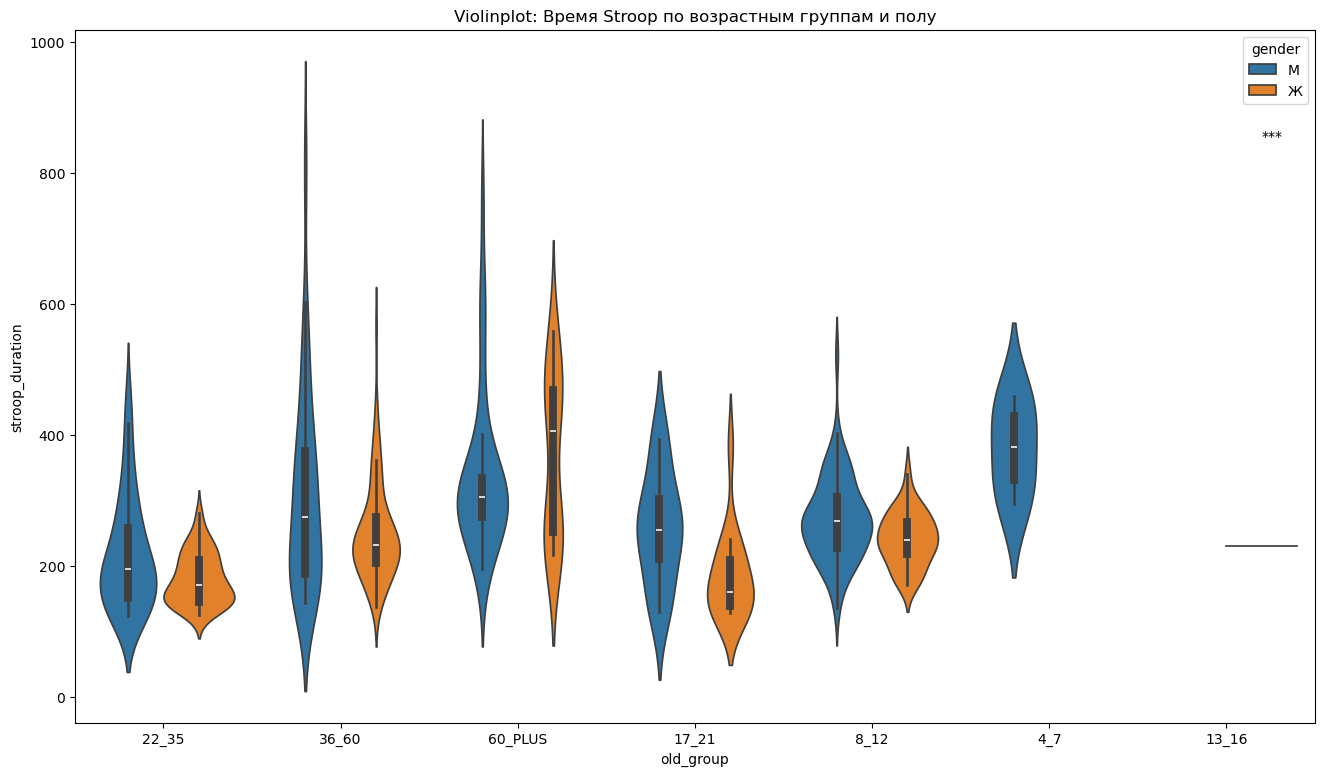

In [36]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

#Loading and reading dataset
#df - dataframe
df = pd.read_excel("dataset_mental_report_new.xlsx")

#mean - среднее значение, std - стандртное отклонение
df.drop(["Unnamed: 0"], axis = 1, inplace = True) #Удалил первый столбец.

#print(df.head(50))
#print(df.shape)
#print(df.info())
#print(df.describe())

x = df.query('gender == "М"')['stroop_duration']
y = df.query('gender == "Ж"')['stroop_duration']


from scipy.stats import mannwhitneyu 
stats, alpha = mannwhitneyu(x, y)
print("stats =", stats, "|", "alpha =", alpha)

if (alpha > 0.05):
    print("Статистически значимых различий нет")
    text = ""
elif (alpha > 0.01):
    print("Статистически значимые различия есть")
    text = "*"
elif (alpha > 0.001):
    print("Статистически значимые различия есть")
    text = "**"
else:
    print("Статистически значимые различия есть")
    text = "***"


#Violinplot
plt.figure(figsize = (16,9))
sns.violinplot(data = df, x = 'old_group', y = 'stroop_duration', hue = 'gender')
plt.title("Violinplot: Время Stroop по возрастным группам и полу")
plt.text(6.2, 850, text, fontsize = 10)
plt.show()
